## Uganda Transactions Analysis

In [1]:
# importing packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
palette = sns.color_palette("mako")

In [10]:
# loading the data
df = pd.read_csv('uganda_stockist_sale_transactions.csv')
df[:10]

,sale_date,saletransaction_id,product_name,product_id,depot_name,unit_cost,unit_price,region_name,manufacturer_name,category_name,product_type,price_type,depot_county_name,depot_id,quantity
0,2023-02-05 16:42:00 UTC,85560592,salt,561372,MAK TICI,45000.0,60000.0,Northern Region - UG,Tata Chemicals,Minerals and Supplements,50kgs,Retail,Amuru,3216,2
1,2023-02-05 22:55:12 UTC,86322399,Aluminum Phosphate (Zinc Tablets),620039,buluganya 1,4000.0,5000.0,Eastern Region - UG,etg,pesticide,960gm,Retail,Mbale,3296,1
2,2023-02-05 22:55:12 UTC,86322397,passion Fruits,620022,buluganya 1,7500.0,9000.0,Eastern Region - UG,East African Seed Company Ltd.,Seeds,50kgs,Retail,Mbale,3296,1
3,2023-02-05 18:20:24 UTC,85567796,4x6,494272,EVA FORTPORTAL,168000.0,200000.0,Western Region - UG,Comfoam,Mattress,QD,Retail,Kabarole,2900,1
4,2023-02-05 17:08:24 UTC,85561791,"4""",609611,EVA FORTPORTAL,64000.0,76000.0,Western Region - UG,Flex Foam,Mattress,TE,Retail,Kabarole,2900,1
5,2023-02-05 08:57:21 UTC,85547340,Egg Plant Black Beauty,492980,EVA FORTPORTAL,1000.0,2000.0,Western Region - UG,seeds,Agrochemicals,2g,Retail,Kabarole,2900,1
6,2023-02-05 08:57:21 UTC,85547338,Cabbage Copenhagen,493082,EVA FORTPORTAL,2000.0,4000.0,Western Region - UG,Home Harvest,Agrochemicals,10g,Retail,Kabarole,2900,1
7,2023-02-05 17:43:04 UTC,85562035,4x6,623671,EVA FORTPORTAL,130000.0,150000.0,Western Region - UG,Nice Foam,Mattress,TE,Retail,Kabarole,2900,1
8,2023-02-05 17:43:04 UTC,85562036,"6""",494242,EVA FORTPORTAL,109000.0,117000.0,Western Region - UG,Royal Foam,Mattress,Open,Retail,Kabarole,2900,1
9,2023-02-05 17:06:39 UTC,85561790,Bed Sheets,494301,EVA FORTPORTAL,9500.0,15000.0,Western Region - UG,Sino Textile,Agrochemicals,Pc,Retail,Kabarole,2900,2


In [7]:
# filtering categories
categories = ['Agrochemicals', 'Equipment', 'Feeds', 'Fertilizers', 'Hygiene', 'Minerals and Supplements', 'Seeds', 'Services', 'Veterinary Products']
df = df[df['category_name'].isin(categories)]
df.reset_index(drop = True)
df['product_name'].unique()

array(['salt', 'passion Fruits', 'Egg Plant Black Beauty', ...,
       'Wormicid 150g Sheep & Goat', 'Sequzene 2.36g', 'V Multinor Bolus'],
      dtype=object)

### **Brand Popularity**

In [14]:
def quantity_count(df):
    products = df['product_name'].unique()
    product_details = []
    for product in products:
        details = {}
        product_df = df[df['product_name'] == product]
        details['brand'] = product
        details['quantity'] = product_df['quantity'].sum()
        product_details.append(details)

    new_df = pd.DataFrame(product_details)
    new_df = new_df.sort_values(by = 'quantity', ascending = False)
    new_df = new_df[:10]
    return new_df

brand_pop_df = quantity_count(df)

In [13]:
# # brand popularity
# counts = df['product_name'].value_counts()
# percentages = (counts/counts.sum()) *100
# prod_pop_df = pd.DataFrame({
#               'Counts': counts,
#               'Percentages': percentages})
# top_10_prod = prod_pop_df.sort_values(by='Percentages', ascending=False)[:10]
# top_10_prod.drop('DK 777', inplace=True)

# _=plt.bar(top_10_prod.index, top_10_prod['Percentages'])
# # _=plt.title('Brand popularity', fontweight='bold', fontsize=16, color='black', fontfamily='serif')
# _=plt.ylabel('Percentage of Sales')
# _=plt.tick_params(rotation = 75)
# _=plt.gcf().set_size_inches(20,8)

new_df

# group by district and product, and sum the quantity sold
grouped = df.groupby(['district', 'product']).agg({'quantity': 'sum'})

# group by district, and get the index of the row with the highest quantity
idx = grouped.groupby('district')['quantity'].idxmax()

# select the rows with the highest quantity for each district
result = grouped.loc[idx, :].reset_index()

# keep only the 'district', 'product', and 'quantity' columns
result = result[['district', 'product', 'quantity']]


NameError: name 'new_df' is not defined

From the analysis, the top 10 most popular brands in Uganda are:
- Dudu Acelamectin
- Weedmaster
- Sevin Dudu Dust
- Indofil
- Vegimax
- DAP
- Maize DK777
- Easygro Flower and Fruit
- Wormicid 150 Sheep & Goat'

### **Brands vs. Counties**

In [5]:
# products vs. counties
_=df.groupby('depot_county_name')['product_name'].value_counts()
most_common_prod = _.groupby('depot_county_name').head(1)
common_df = pd.DataFrame(most_common_prod)
common_df.rename(columns = {'product_name': 'product_count'}, inplace=True)
common_df.reset_index(inplace=True)
new = pd.DataFrame(df['depot_county_name'].value_counts()).reset_index().sort_values(by = 'index', ascending = True)
new.rename(columns = {'index': 'depot_county_name', 'depot_county_name': 'total'}, inplace=True)
most_common_prod_df = pd.merge(common_df, new, on='depot_county_name')
most_common_prod_df['proportion %'] = round((most_common_prod_df['product_count'] / most_common_prod_df['total']) * 100, 1)
most_common_prod_df.rename(columns = {'depot_county_name': 'District'}, inplace=True)

# saving the data to an excel file
writer = pd.ExcelWriter('brand_popularity_per_county.xlsx', engine='xlsxwriter')
most_common_prod_df.to_excel(writer, index=False)
writer.save()

# view
brand_df = pd.read_excel('brand_popularity_per_county.xlsx')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(brand_df)


,District,product_name,product_count,total,proportion %
0,Abim,African Egg Plant Ngogwe,3,21,14.3
1,Amuria,Sevin Dudu Dust,635,2536,25.0
2,Amuru,Sevin Dudu Dust,190,1534,12.4
3,Apac,Super gro,412,2938,14.0
4,Bugiri,Dudu Acelamectin,66,363,18.2
5,Bugweri,DAP,68,629,10.8
6,Buikwe,Weedmaster,336,2608,12.9
7,Bukedea,Vegimax,31,268,11.6
8,Bulambuli,Kynoch Horti,63,772,8.2
9,Bunyangabu,Indofil bag,196,1384,14.2


- The above table shows the most popular brand per district and the proportion of its sales. For instance, the most popular brand in Abim is African Egg Plant Ngogwe and it accounts for about 14.3% of all sales in the district.
- You can access the data in the 'brand_popularity_per_county' excel file within the repository.

### **Volume per Region**

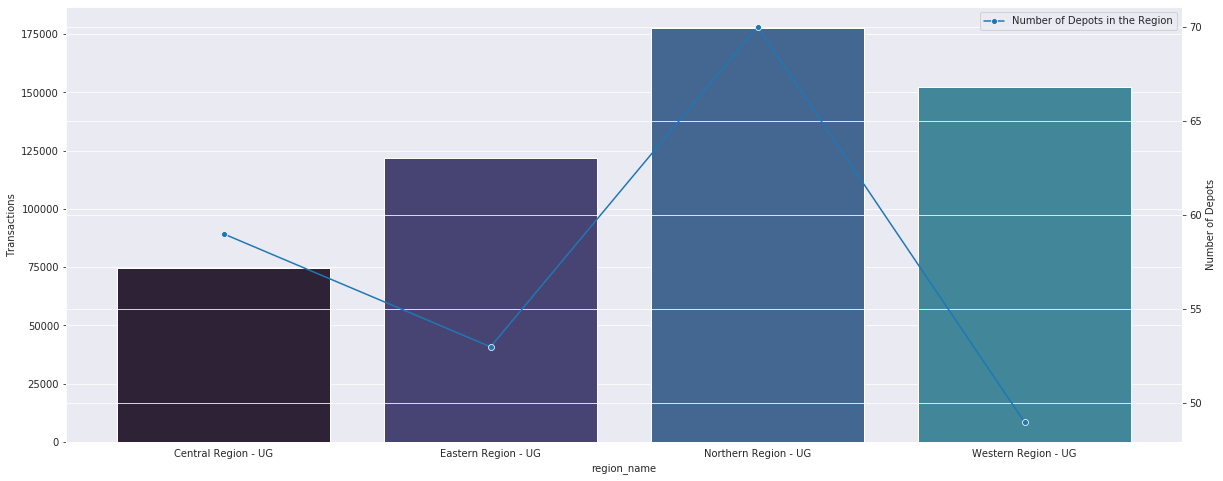

,region_name,number_of_depots
0,Central Region - UG,59
1,Eastern Region - UG,53
2,Northern Region - UG,70
3,Western Region - UG,49


In [6]:
# sale transactions per region
depot_df = df.groupby('region_name')['depot_id'].nunique().to_frame().reset_index()
depot_df.rename(columns = {'depot_id': 'number_of_depots'}, inplace=True)

# Setting up the figure
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()

# Plotting on the ax object
ax1 = sns.countplot(x = df['region_name'], palette= palette, ax=ax1, order = ['Central Region - UG', 'Eastern Region - UG', 'Northern Region - UG', 'Western Region - UG'])
ax2 = sns.lineplot(x='region_name', y='number_of_depots', data=depot_df, ax=ax2, sort=False, marker = 'o', label = 'Number of Depots in the Region')
# plt.title('Volume per Region', fontweight='bold', fontsize=14, color='black', fontfamily='serif')
ax1.set_ylabel('Transactions')
ax2.set_ylabel('Number of Depots')
plt.gcf().set_size_inches(20,8)
plt.legend()
plt.show()

display(depot_df)

- The above figure shows the volume for each region in the past year as well as the number of depots in the region. 
- Northern Region - UG had the most sales with 177799, followed by Western Region - UG with 152140, Eastern Region - UG with 121809, and Central Region - UG with 74494.
- Northern Region - UG has 70 depots, Western Region - UG 49, Eastern Region - UG 53, and Central Region - UG 59.

### **Top Manufacturers**

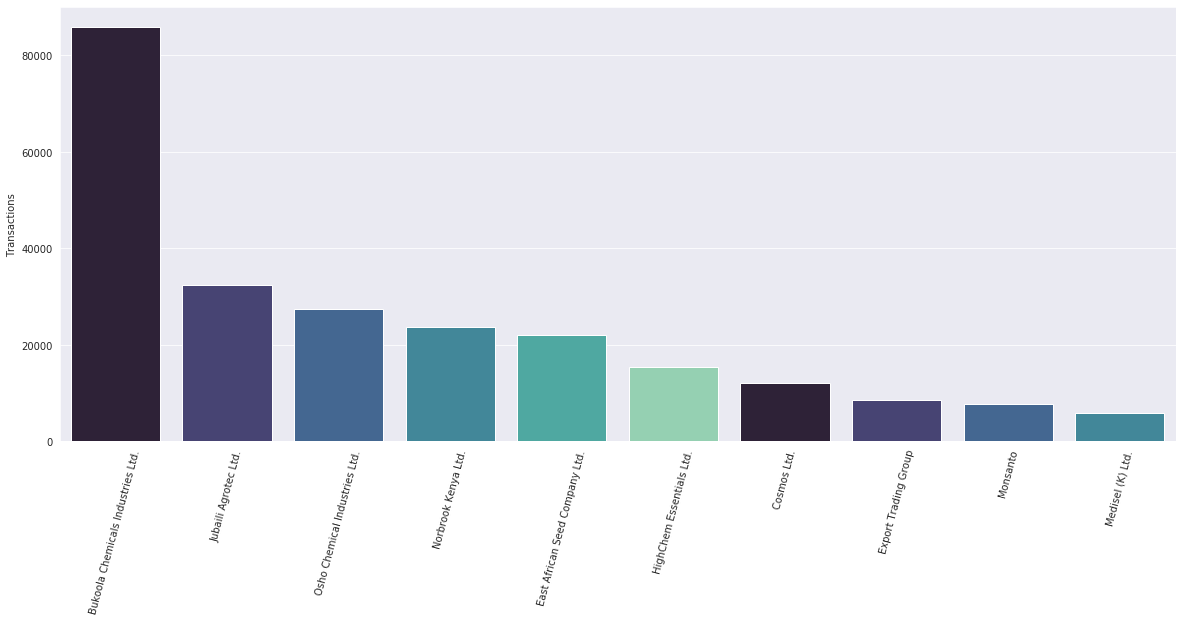

In [7]:
# checking the top manufacturers
manuf = df['manufacturer_name'].value_counts()[:10].to_frame()
ax = sns.barplot(x = manuf.index, y = manuf['manufacturer_name'], palette=palette)
# plt.suptitle('Top 10 manufacturers', fontweight='bold', fontsize=14, color='black', fontfamily='serif')
plt.ylabel('Transactions')
plt.xticks(rotation=75)
plt.gcf().set_size_inches(20,8)
plt.show()

- The figure above shows the top 10 manufacturers in Uganda.
- Bukoola Chemicals Industries Ltd. is the top manufacturer. Over 80,000 of the transactions in the past year were for products manufactured by the company.

### **Manufacturers vs. Products**

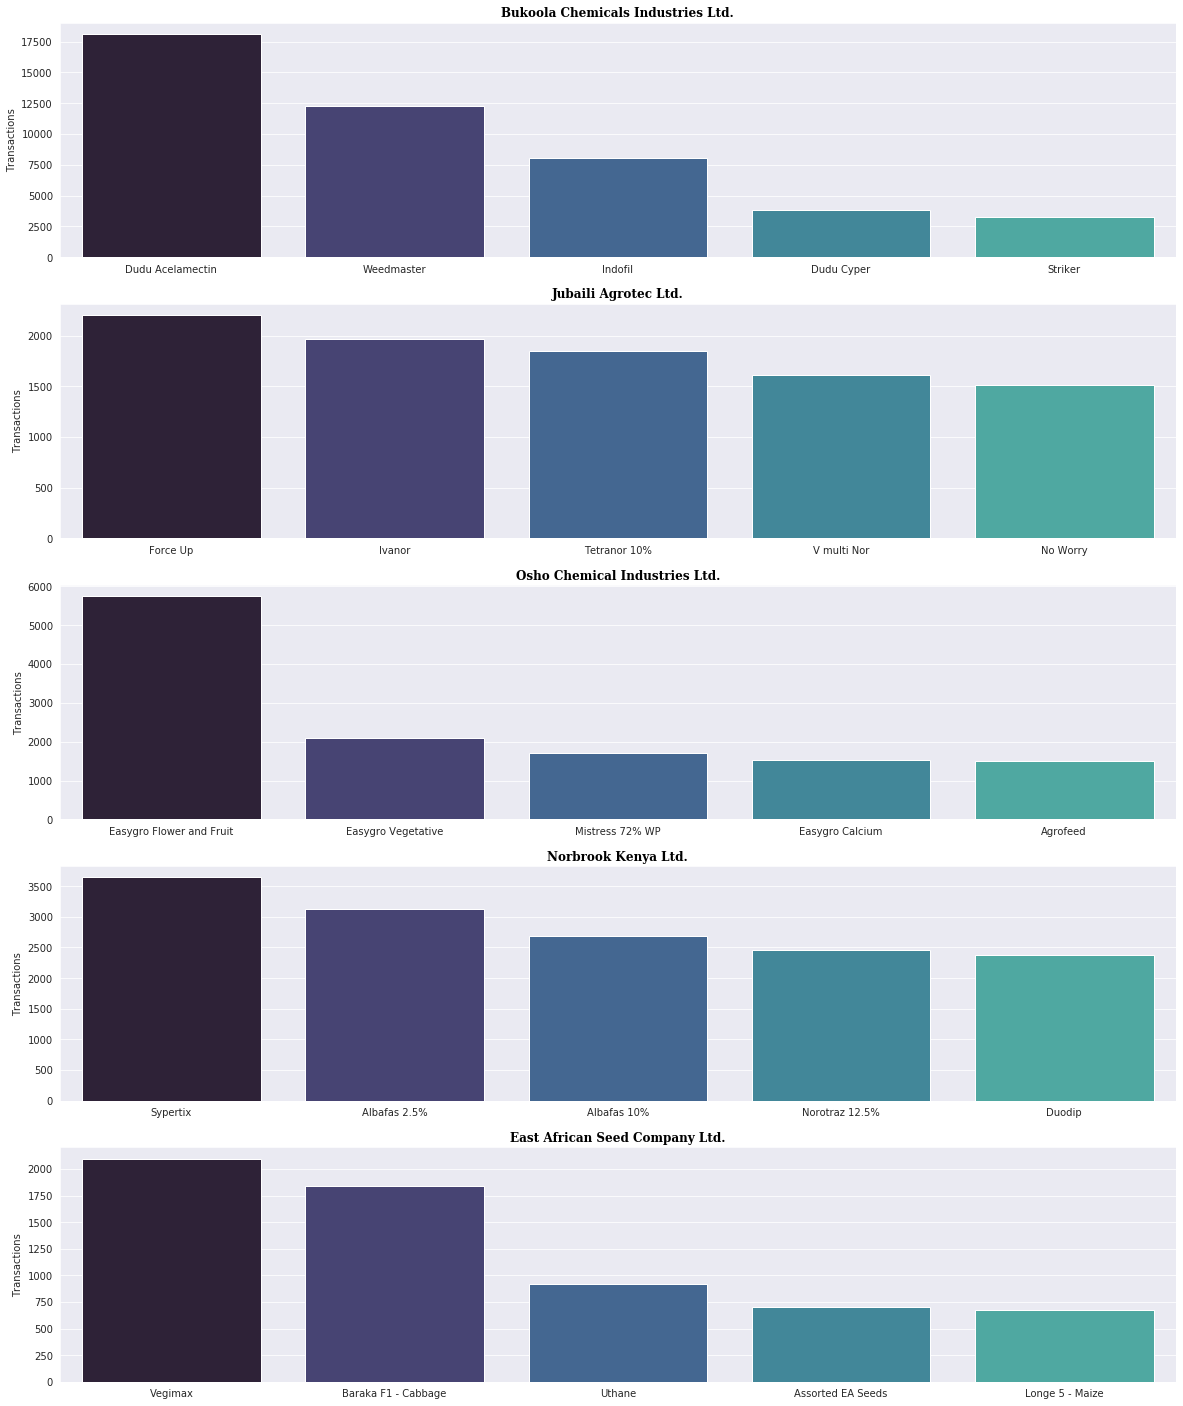

In [8]:
# manufacturers vs. products
# creating dataframes to be visualized
Bukoola = df[df['manufacturer_name'] == 'Bukoola Chemicals Industries Ltd.']
Bukoola = Bukoola['product_name'].value_counts()[:5].to_frame()
Bukoola.rename(columns = {'product_name': 'Bukoola Chemicals Industries Ltd.'}, inplace=True)

Jubaili = df[df['manufacturer_name'] == 'Jubaili Agrotec Ltd.']
Jubaili = Jubaili['product_name'].value_counts()[:5].to_frame()
Jubaili.rename(columns = {'product_name': 'Jubaili Agrotec Ltd.'}, inplace=True)

Osho = df[df['manufacturer_name'] == 'Osho Chemical Industries Ltd.']
Osho = Osho['product_name'].value_counts()[:5].to_frame()
Osho.rename(columns = {'product_name': 'Osho Chemical Industries Ltd.'}, inplace=True)

Norbrook = df[df['manufacturer_name'] == 'Norbrook Kenya Ltd.']
Norbrook = Norbrook['product_name'].value_counts()[:5].to_frame()
Norbrook.rename(columns = {'product_name': 'Norbrook Kenya Ltd.'}, inplace=True)

EASC = df[df['manufacturer_name'] == 'East African Seed Company Ltd.']
EASC = EASC['product_name'].value_counts()[:5].to_frame()
EASC.rename(columns = {'product_name': 'East African Seed Company Ltd.'}, inplace=True)

# generating the figure and axes
fig, axs = plt.subplots(5, 1, figsize = (20,25))
# fig.suptitle('Manufacturers vs. Products', fontweight='bold', fontsize=18, color='black', fontfamily='serif', y=0.91)
axs = axs.ravel()

# creating the list of dfs to be plotted
list_dfs = [Bukoola, Jubaili, Osho, Norbrook, EASC]

# plotting the data
for n, data in enumerate(list_dfs):
    sns.barplot(x = data.index, y = data.iloc[:,0], palette= palette, ax = axs[n])
    axs[n].set_title(data.columns[0], fontweight='bold', fontsize=12, color='black', fontfamily='serif')
    axs[n].set_ylabel('Transactions')

- The above figure shows the top 5 manufacturers and their most popular products.
- For Bukoola Chemicals Industries Ltd., the most popular products are Dudu Acelamectin, Weedmaster, Indofil, Dudu Cyper, and Striker.

### **Regions vs. Manufacturers**

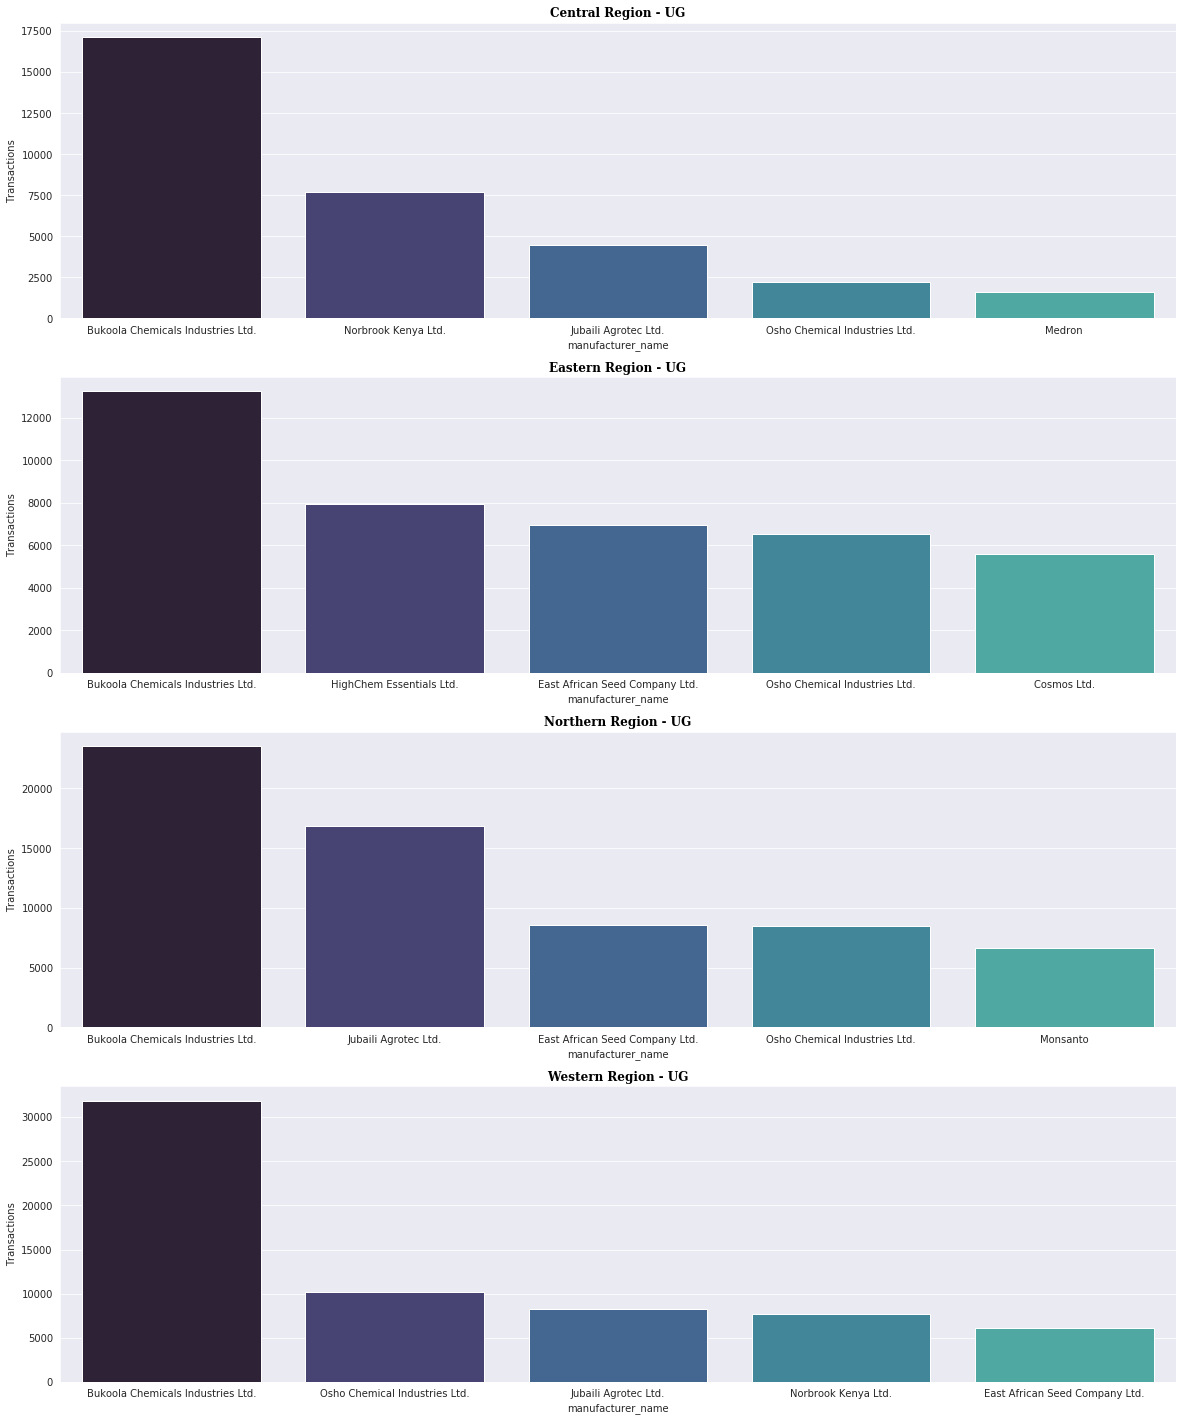

In [9]:
# regions vs. manufacturers
_=df.groupby('region_name')['manufacturer_name'].value_counts()
most_common_manuf = _.groupby('region_name').head()
manuf_by_region = pd.DataFrame(most_common_manuf)
manuf_by_region.rename(columns = {'manufacturer_name': 'count'}, inplace=True)
manuf_by_region.reset_index(inplace = True)

# generating the figure and axes
fig, axs = plt.subplots(4, 1, figsize = (20,25))
# fig.subplots_adjust(hspace = .5, wspace=.1)
# fig.suptitle('Regions vs Manufacturers', fontweight='bold', fontsize=18, color='black', fontfamily='serif', y=0.91)
axs = axs.ravel()   
regions = ['Central Region - UG', 'Eastern Region - UG', 'Northern Region - UG', 'Western Region - UG']
for n, region in enumerate(regions):
    data = manuf_by_region[manuf_by_region['region_name'] == region]
    sns.barplot(x = data['manufacturer_name'], y = data['count'], palette= palette, ax = axs[n])
    axs[n].set_title(region, fontweight='bold', fontsize=12, color='black', fontfamily='serif')
    axs[n].set_ylabel('Transactions')

- The above figure shows the top manufacturers in each region.
- Bukoola Chemicals Industries Ltd. is the top manufacturer in all regions.

### **Regions vs. Categories**

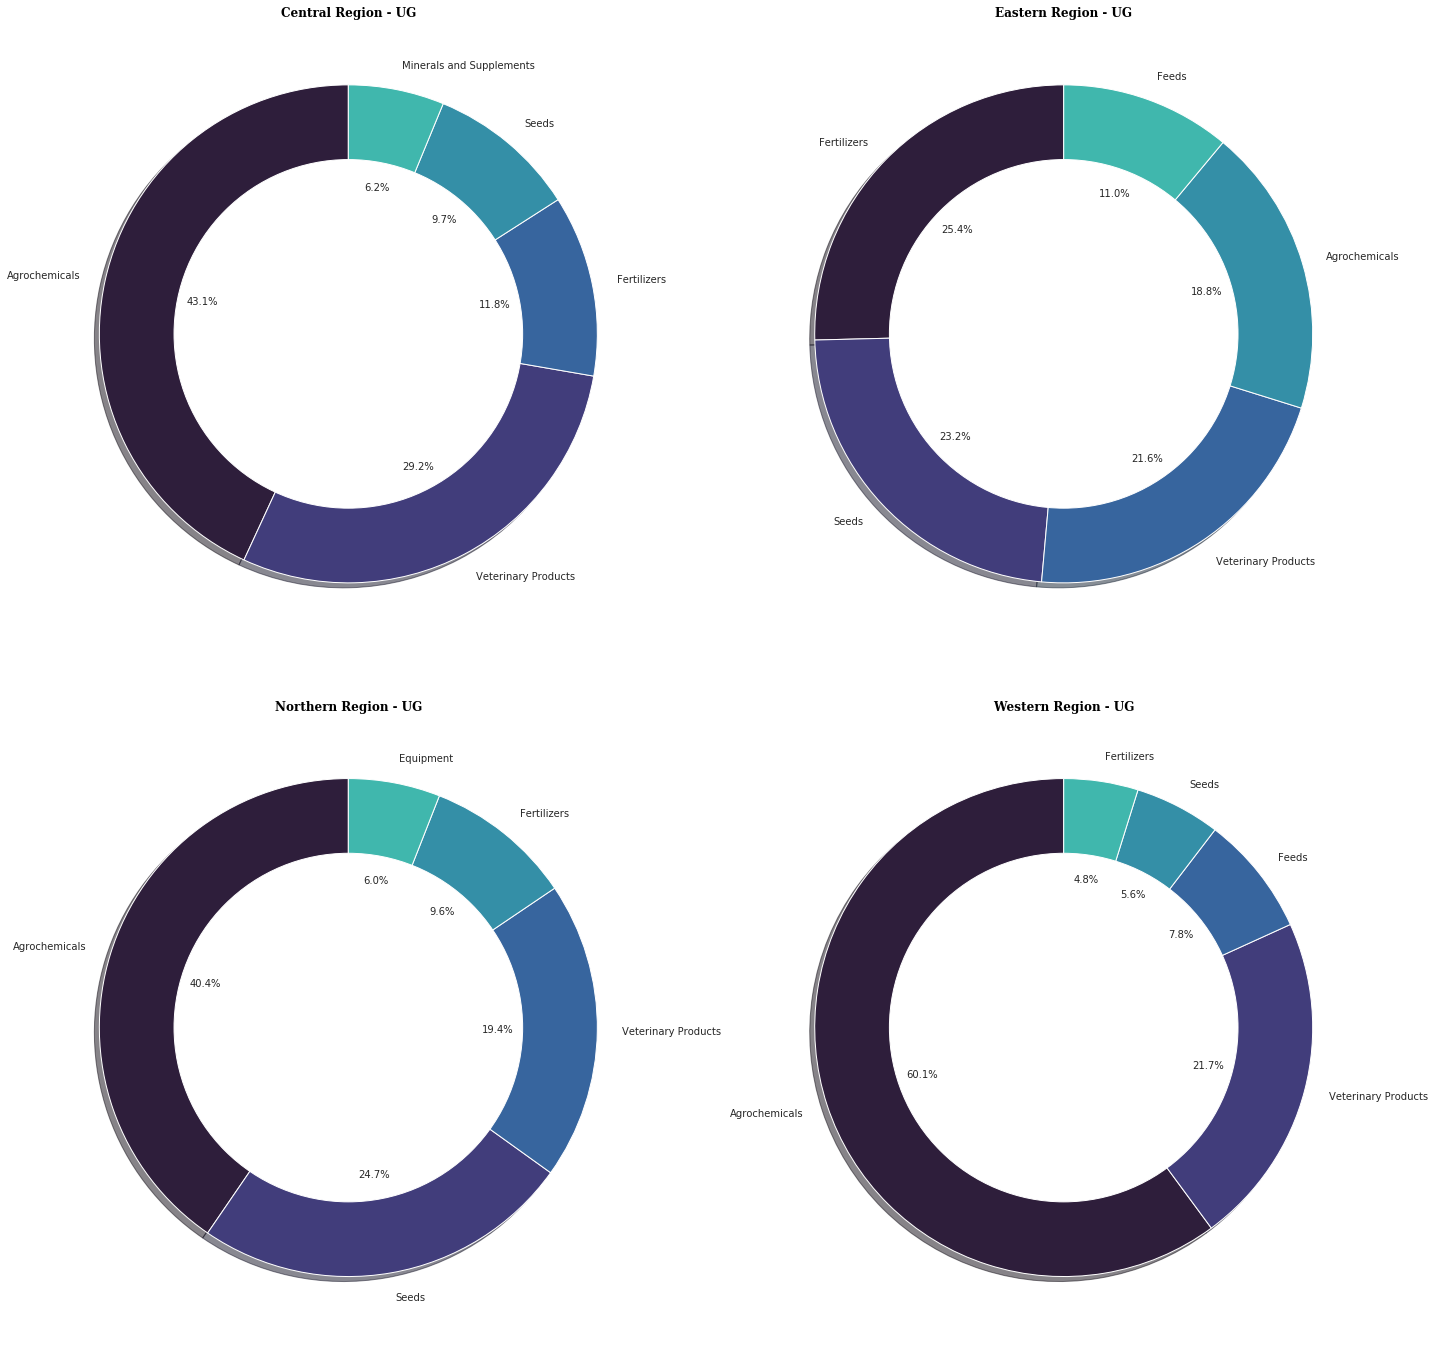

In [10]:
# regions vs. product categories
_=df.groupby('region_name')['category_name'].value_counts()
most_common_categ = _.groupby('region_name').head()
categ_by_region = pd.DataFrame(most_common_categ)
categ_by_region.rename(columns = {'category_name': 'count'}, inplace=True)
categ_by_region.reset_index(inplace = True)
categ_by_region

# generating the figure and axes
fig, axs = plt.subplots(2, 2, figsize = (20,20))
fig.subplots_adjust(hspace = .5, wspace=.1)
# fig.suptitle('Regions vs Product Categories', fontweight='bold', fontsize=18, color='black', fontfamily='serif', y=0.99)
axs = axs.ravel()   
regions = ['Central Region - UG', 'Eastern Region - UG', 'Northern Region - UG', 'Western Region - UG']

def donut_plot(df, col, title, ax, color = sns.color_palette("mako"), labels = None):
    data = df[col].value_counts()
    data = df[df[col] == region]
    if labels is None:
        labels = data['category_name']
    ax.pie(data['count'], colors = color, autopct = '%1.1f%%', shadow = True, startangle = 90, labels = labels)
    circle = plt.Circle((0,0), 0.7, color = 'white')
    ax.add_artist(circle)
    ax.set_title(title, fontweight='bold', fontsize=12, color='black', fontfamily='serif')
    plt.tight_layout()

for n, region in enumerate(regions):
    title = region
    donut_plot(categ_by_region, 'region_name', title = title, ax = axs[n])

- The above figure shows the most common categories per region and the proportion percentage of each.
- The values vary from region to region, however, agrocemicals seem to be a constant.

### **Brands vs. Regions**

In [11]:
# creating a fuction to filter the top brands in each region
def count_tables(df):
    top_products = df['product_name'].value_counts().nlargest(5).index.tolist()
    product_details = []
    for product in top_products:
        details = {}
        details['product'] = product
        details['value_counts'] = df.loc[df['product_name'] == product, 'product_name'].count()
        details['category'] = df.loc[df['product_name'] == product, 'category_name'].iloc[0]
        details['manufacturer'] = df.loc[df['product_name'] == product, 'manufacturer_name'].iloc[0]
        product_details.append(details)
        region = df.loc[df['product_name'] == product, 'region_name'].iloc[0]

    new_df = pd.DataFrame(product_details)
    new_df['proportion %'] = round((new_df['value_counts'] / len(df)) * 100, 1)
    new_df.drop('value_counts', axis =1, inplace = True)

    print('\033[1m' + f'Top brands in {region}' + '\033[0m')
    display(new_df)
    print('\n')

central = df[df['region_name'] == 'Central Region - UG']
eastern = df[df['region_name'] == 'Eastern Region - UG']
northern = df[df['region_name'] == 'Northern Region - UG']
western = df[df['region_name'] == 'Western Region - UG']

regions = [central, eastern, northern, western]

# calling the function
for i, n in enumerate(regions):
    count_tables(n)

Top brands in Central Region - UG


,product,category,manufacturer,proportion %
0,Dudu Acelamectin,Agrochemicals,Bukoola Chemicals Industries Ltd.,6.6
1,Weedmaster,Agrochemicals,Bukoola Chemicals Industries Ltd.,3.8
2,Duodip,Veterinary Products,Norbrook Kenya Ltd.,2.0
3,Vegimax,Agrochemicals,Bukoola Chemicals Industries Ltd.,1.5
4,Sypertix,Veterinary Products,Norbrook Kenya Ltd.,1.5




Top brands in Eastern Region - UG


,product,category,manufacturer,proportion %
0,Sevin Dudu Dust,Agrochemicals,HighChem Essentials Ltd.,5.4
1,Dudu Acelamectin,Agrochemicals,Bukoola Chemicals Industries Ltd.,4.0
2,Wormicid 150 Sheep & Goat,Veterinary Products,Cosmos Ltd.,3.6
3,Easygro Flower and Fruit,Fertilizers,Osho Chemical Industries Ltd.,2.3
4,DAP,Fertilizers,Export Trading Group,2.2




Top brands in Northern Region - UG


,product,category,manufacturer,proportion %
0,Maize DK777,Seeds,Monsanto,4.1
1,DK 777,Seeds,DEKALD,3.4
2,Dudu Acelamectin,Agrochemicals,Bukoola Chemicals Industries Ltd.,2.5
3,DAP,Fertilizers,Thabiti,2.1
4,Sevin Dudu Dust,Hygiene,HighChem Essentials Ltd.,1.9




Top brands in Western Region - UG


,product,category,manufacturer,proportion %
0,Weedmaster,Agrochemicals,Bukoola Chemicals Industries Ltd.,4.2
1,Dudu Acelamectin,Agrochemicals,Bukoola Chemicals Industries Ltd.,2.6
2,Indofil,Agrochemicals,Bukoola Chemicals Industries Ltd.,1.4
3,WEED MASTER 75.7XL,Agrochemicals,Bukoola Chemicals Industries Ltd.,1.4
4,Vegimax,Agrochemicals,Agriscope (Africa) Ltd,1.3


- The above tables show the most popular brands in each region, their categories, manufacturers, and proportion of sales.